## Import libaries

In [161]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Processing
### Read the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library.

In [162]:
## Reading the data and removing columns that are not important.
## It reads the CSV file, removes unnecessary columns, and stores the cleaned data into a Pandas DataFrame for further processing.
df = pd.read_csv("amazon-review-dataset.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [163]:
# print head of data frame with help of head function
df.head()

review_id                                               text  \
0  product_review_000000  I had received my copy of this new version of ...   
1  product_review_000001  That ever since i purchased my DS when it was ...   
2  product_review_000002          Simple, and just a bit goes a long way..    
3  product_review_000003  I have not played any of the other games in th...   
4  product_review_000004  i got it quick and it was in great shape works...   

  verified  review_score     product_category  
0     True           3.0          video_games  
1    False           5.0          video_games  
2     True           5.0  musical_instruments  
3     True           4.0          video_games  
4     True           5.0          video_games

### Clean the data

In [164]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get the English stop words
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review.
    '''
    nltk.download('stopwords')

    # Remove  non-alphanumeric characters.
    review = re.sub(r'\W+', ' ', review)

    # Lowercase the review
    review = review.lower()

    # Remove punctuations
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Remove links
    review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)

    # Tokenize the review
    tokens = word_tokenize(review)

    # Remove stopwords and perform lemmatization
    review_cleaned = []
    for token in tokens:
        if token not in stop_words:
            cleaned_token = lemmatizer.lemmatize(token)
            review_cleaned.append(cleaned_token)

    # Join the cleaned tokens back into a string
    review_cleaned = ' '.join(review_cleaned)

    return review_cleaned

[nltk_data] Downloading package wordnet to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [166]:
df['text'] = df['text'].apply(lambda x : clean_review(str(x)))
df.head()

[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloadin

review_id                                               text  \
0  product_review_000000  received copy new version igt slot game almost...   
1  product_review_000001  ever since purchased d first released knew wou...   
2  product_review_000002                             simple bit go long way   
3  product_review_000003  played game katamari series owning console how...   
4  product_review_000004  got quick great shape work fine problem like k...   

  verified  review_score     product_category  
0     True           3.0          video_games  
1    False           5.0          video_games  
2     True           5.0  musical_instruments  
3     True           4.0          video_games  
4     True           5.0          video_games

### Count plot of the output categories: score distribution

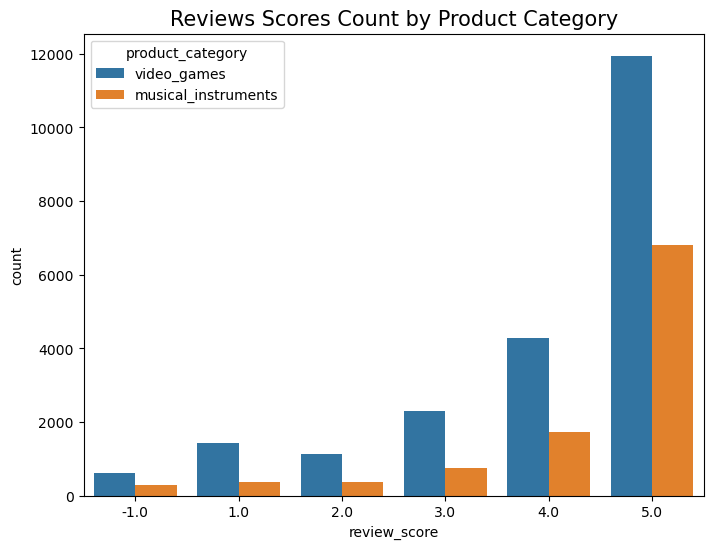

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure with a size of 8 x 6 inches.
plt.figure(figsize=(8, 6))

# Generate a count plot using the seaborn library.
# It counts the number of occurrences of each value in the 'review_score' column of the df DataFrame and groups by 'product_category'.
sns.countplot(x='review_score', hue='product_category', data=df)

# Set the plot title and title font size.
plt.title("Reviews Scores Count by Product Category", fontsize=15)

# Display the generated plot.
plt.show()

## Processing
### Upsampling the minority

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction.

Feel free to use 'resample' library from sklearn.

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Find the number of samples in the largest class.
max_size = df['review_score'].value_counts().max()

# Create an empty DataFrame to store the balanced data.
df_upsampled = pd.DataFrame()

for score in df['review_score'].unique():
    # Handle each class separately.
    df_score = df[df['review_score'] == score]

    # Use resample to upsample the smaller classes.
    df_score_upsampled = resample(df_score,
                                  replace=True,
                                  n_samples=max_size,
                                  random_state=101)

    # Add the upsampled data to the result DataFrame.
    df_upsampled = pd.concat([df_upsampled, df_score_upsampled])

# Randomly shuffle the balanced dataset.
df_upsampled = df_upsampled.sample(frac=1)

Make sure each score is in the same size

In [ ]:
sorted_scores = sorted(df_upsampled['review_score'].unique())

for score in sorted_scores:
    shape = df_upsampled[df_upsampled.review_score == score].shape
    print(f"Review score {score}: {shape}")

Review score -1.0: (19289, 5)
Review score 1.0: (19289, 5)
Review score 2.0: (19289, 5)
Review score 3.0: (19289, 5)
Review score 4.0: (19289, 5)
Review score 5.0: (19289, 5)


### Count plot of the output categories after upsampled

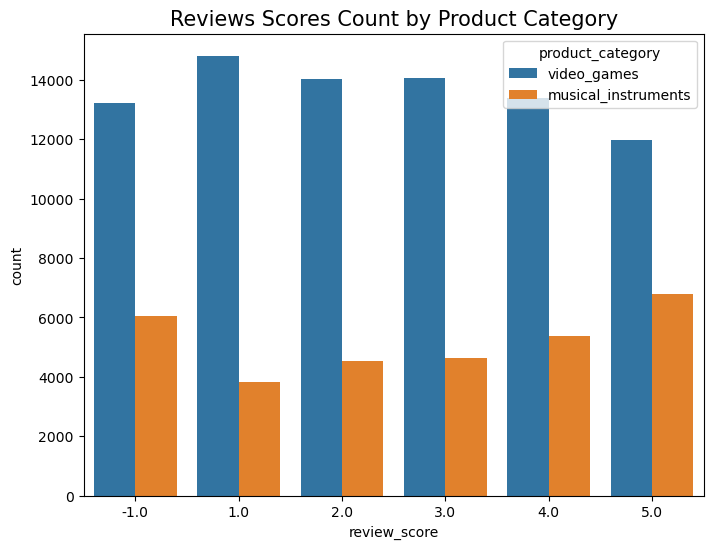

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure with a size of 8 x 6 inches.
plt.figure(figsize=(8, 6))

# Generate a count plot using the seaborn library.
# It counts the number of occurrences of each value in the 'review_score' column of the df DataFrame and groups by 'product_category'.
sns.countplot(x='review_score', hue='product_category', data=df_upsampled)

# Set the plot title and title font size.
plt.title("Reviews Scores Count by Product Category", fontsize=15)

# Display the generated plot.
plt.show()

### CounterVectorizer
Use CountVectorizer  from Scikit-learn to transform the review texts into numerical vectors, considering the frequency of each word.

In [ ]:
# Keep key information
df_upsampled = df_upsampled[["review_id","text","review_score"]]
df_upsampled

review_id  \
17949  product_review_017949   
15132  product_review_015132   
25117  product_review_025117   
17401  product_review_017401   
6999   product_review_006999   
...                      ...   
23525  product_review_023525   
23394  product_review_023394   
64     product_review_000064   
2084   product_review_002084   
25933  product_review_025933   

                                                    text  review_score  
17949  game fun wanted shooter type gaming sorry happ...           1.0  
15132  love game death want buried flawed love uncond...           5.0  
25117  thing note game one unique combat system diffe...          -1.0  
17401           great game trying finish soon great game           4.0  
6999   mixed product took figure price go instruction...           2.0  
...                                                  ...           ...  
23525                                   really challenge           5.0  
23394  knight old republic 2 way extraordinarily simi...           3.0  
64     long time follower atlus release one might eve...           3.0  
2084   new dragon age story rating may higher fan ori...           4.0  
25933  lava string improved sound playability bariton...           5.0  

[115734 rows x 3 columns]

### Transform
Transform texts into vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0.01)
X = vectorizer.fit_transform(df_upsampled['text'])

# Convert the resulting sparse matrix to a DataFrame
# Process data into small batches
batch_size = 1000
num_batches = len(df_upsampled) // batch_size + 1

vectorized_data_list = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df_upsampled))

    # Process text data in batches
    X_batch = vectorizer.transform(df_upsampled['text'].iloc[start_idx:end_idx])
    vectorized_data_list.append(pd.DataFrame(X_batch.toarray(), columns=vectorizer.get_feature_names_out()))

# Merge the results of batch processing
vectorized_data = pd.concat(vectorized_data_list, axis=0, ignore_index=True)
vectorized_data

10  100  12  15  20  30  360  3d  3rd  40  ...  worse  worst  worth  \
0        0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
1        0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
2        0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
3        0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
4        0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
...     ..  ...  ..  ..  ..  ..  ...  ..  ...  ..  ...    ...    ...    ...   
115729   0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
115730   0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
115731   0    0   0   0   1   0    0   0    1   0  ...      0      0      0   
115732   0    0   0   0   0   0    0   0    0   0  ...      0      0      0   
115733   0    0   0   0   0   0    0   0    0   0  ...      0      0      0   

        would  wow  wrong  xbox  year  yes  yet  
0           0    0      0     0     0    0    0  
1           0    0      0     0     0    0    0  
2           0    0      0     0     0    0    0  
3           0    0      0     0     0    0    0  
4           0    0      0     0     0    0    0  
...       ...  ...    ...   ...   ...  ...  ...  
115729      0    0      0     0     0    0    0  
115730      0    0      0     0     0    0    0  
115731      1    0      0     0     1    1    0  
115732      2    0      0     1     0    0    0  
115733      0    0      0     0     0    0    0  

[115734 rows x 1004 columns]

In [ ]:
# Reset the index to ensure the index is unique
df_upsampled.reset_index(drop=True, inplace=True)
# Merge vectorized data with original data
result_df = pd.concat([df_upsampled, vectorized_data], axis=1)
result_df

review_id  \
0       product_review_017949   
1       product_review_015132   
2       product_review_025117   
3       product_review_017401   
4       product_review_006999   
...                       ...   
115729  product_review_023525   
115730  product_review_023394   
115731  product_review_000064   
115732  product_review_002084   
115733  product_review_025933   

                                                     text  review_score  10  \
0       game fun wanted shooter type gaming sorry happ...           1.0   0   
1       love game death want buried flawed love uncond...           5.0   0   
2       thing note game one unique combat system diffe...          -1.0   0   
3                great game trying finish soon great game           4.0   0   
4       mixed product took figure price go instruction...           2.0   0   
...                                                   ...           ...  ..   
115729                                   really challenge           5.0   0   
115730  knight old republic 2 way extraordinarily simi...           3.0   0   
115731  long time follower atlus release one might eve...           3.0   0   
115732  new dragon age story rating may higher fan ori...           4.0   0   
115733  lava string improved sound playability bariton...           5.0   0   

        100  12  15  20  30  360  ...  worse  worst  worth  would  wow  wrong  \
0         0   0   0   0   0    0  ...      0      0      0      0    0      0   
1         0   0   0   0   0    0  ...      0      0      0      0    0      0   
2         0   0   0   0   0    0  ...      0      0      0      0    0      0   
3         0   0   0   0   0    0  ...      0      0      0      0    0      0   
4         0   0   0   0   0    0  ...      0      0      0      0    0      0   
...     ...  ..  ..  ..  ..  ...  ...    ...    ...    ...    ...  ...    ...   
115729    0   0   0   0   0    0  ...      0      0      0      0    0      0   
115730    0   0   0   0   0    0  ...      0      0      0      0    0      0   
115731    0   0   0   1   0    0  ...      0      0      0      1    0      0   
115732    0   0   0   0   0    0  ...      0      0      0      2    0      0   
115733    0   0   0   0   0    0  ...      0      0      0      0    0      0   

        xbox  year  yes  yet  
0          0     0    0    0  
1          0     0    0    0  
2          0     0    0    0  
3          0     0    0    0  
4          0     0    0    0  
...      ...   ...  ...  ...  
115729     0     0    0    0  
115730     0     0    0    0  
115731     0     1    1    0  
115732     1     0    0    0  
115733     0     0    0    0  

[115734 rows x 1007 columns]

### Split the data
Split the data into training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Divide training set and test set
train_df, test_df = train_test_split(result_df, test_size=0.2, random_state=42)
train_df

review_id  \
10325   product_review_015002   
83370   product_review_009650   
87544   product_review_016151   
38616   product_review_018512   
72814   product_review_002904   
...                       ...   
76820   product_review_031877   
110268  product_review_010119   
103694  product_review_025392   
860     product_review_001446   
15795   product_review_023205   

                                                     text  review_score  10  \
10325                                          work great           5.0   0   
83370                           box empty another country           1.0   0   
87544   good graphic game add ons made level nearly im...           1.0   0   
38616   work thought sometimes get little worried ligh...           4.0   0   
72814   fun game provided game computer cheat however ...           4.0   0   
...                                                   ...           ...  ..   
76820   recently bought disappointed started using sou...           1.0   0   
110268  story sticking 3 final fantasy get 10 7 6 aka ...          -1.0   2   
103694  bought 2i2 amazon year ago 129 fantastic piece...           5.0   0   
860     despite high powered pc game installs run menu...           1.0   0   
15795   game awesome three arcade game play released a...           5.0   0   

        100  12  15  20  30  360  ...  worse  worst  worth  would  wow  wrong  \
10325     0   0   0   0   0    0  ...      0      0      0      0    0      0   
83370     0   0   0   0   0    0  ...      0      0      0      0    0      0   
87544     0   0   0   0   0    0  ...      0      0      0      0    0      0   
38616     0   0   0   0   0    0  ...      0      0      0      0    0      0   
72814     0   0   0   0   0    0  ...      0      0      2      0    0      0   
...     ...  ..  ..  ..  ..  ...  ...    ...    ...    ...    ...  ...    ...   
76820     0   0   0   0   0    0  ...      0      0      0      0    0      0   
110268    0   0   0   0   0    0  ...      0      0      0      0    0      0   
103694    0   0   0   0   0    0  ...      0      0      0      0    0      0   
860       0   0   1   0   0    0  ...      0      0      0      0    0      0   
15795     0   0   0   0   0    0  ...      0      0      0      1    0      0   

        xbox  year  yes  yet  
10325      0     0    0    0  
83370      0     0    0    0  
87544      0     0    0    0  
38616      0     0    0    0  
72814      0     0    0    0  
...      ...   ...  ...  ...  
76820      0     0    0    0  
110268     0     0    0    0  
103694     0     1    0    1  
860        0     0    0    0  
15795      0     0    0    0  

[92587 rows x 1007 columns]

## Model
### Create the BOW Model and Dataloaders
The model uses a hidden layer with 128 neurons and a relu function. A sigmoid function is used to ensure that the results fall in the range between 0 and 5 (0 for -1 score).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Define the BOW model
class BOWModel(nn.Module):
    def __init__(self, input_dim):
        super(BOWModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(F.relu(x))
        x = F.sigmoid(x)
        return x * 5

# Define the BOWDataset class
class BOWDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text_vector = torch.tensor(self.data[idx], dtype=torch.float32)
        label = torch.tensor(self.label[idx], dtype=torch.float32)
        return text_vector, label

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

### Define the batch size and dataloaders

In [ ]:
bow_batch_size = 512
# Create BOWDataset instance
bow_train_dataset = BOWDataset(train_df.iloc[:, 3:].values, train_df["review_score"].values)
bow_test_dataset  = BOWDataset(test_df.iloc[:, 3:].values, test_df["review_score"].values)

# Create DataLoader

bow_train_loader = DataLoader(bow_train_dataset, batch_size=bow_batch_size, shuffle=True, pin_memory=True)
bow_test_loader = DataLoader(bow_test_dataset, batch_size=bow_batch_size, shuffle=False, pin_memory=True)

### Define parameters of the model

In [ ]:
# Initialize model
input_dim = len(result_df.columns) - 3  # remove 'review_score','review_id' ,'text'
bow_model = BOWModel(input_dim).to(device)

# Define loss function and optimizer
bow_criterion = nn.MSELoss()
bow_optimizer = optim.Adam(bow_model.parameters(), lr=0.001)

### Define training process

In [ ]:
from tqdm import tqdm

# Training model

bow_train_losses = []  # Used to store the training loss for each epoch
bow_train_predictions = []
bow_test_predictions = []
bow_train_labels = []
bow_num_epochs = 20

def bow_train():
    for epoch in range(bow_num_epochs):
        bow_model.train()
        epoch_loss = 0.0
    
        for inputs, labels in tqdm(bow_train_loader, desc=f'Epoch [{epoch+1}/{bow_num_epochs}]: Training'):
            inputs, labels = inputs.to(device), labels.to(device)
            bow_optimizer.zero_grad()
            outputs = bow_model(inputs)
            loss = bow_criterion(outputs.squeeze(), labels)
            loss.backward()
            bow_optimizer.step()
            epoch_loss += loss.item()
        # Calculate and record the average training loss for each epoch
        average_epoch_loss = epoch_loss / len(bow_train_loader)
        bow_train_losses.append(average_epoch_loss)
    
        # Calculate accuracy on test set
        bow_model.eval()
        with torch.no_grad():
            train_predictions = []
            train_labels = []
            for inputs, labels in tqdm(bow_train_loader, desc=f'Epoch [{epoch+1}/{bow_num_epochs}]: Evaluating on training set'):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = bow_model(inputs)
                # pred_y = (outputs.squeeze() >= 0.5).float()
                pred_y = np.rint(outputs.squeeze().cpu().numpy())
                train_predictions.extend(pred_y)
                train_labels.extend(labels.cpu().numpy())
            bow_train_predictions.append(train_predictions)
            bow_train_labels.append(train_labels)
    
            # Calculate accuracy on test set
            test_predictions = []
            for inputs, labels in tqdm(bow_test_loader, desc=f'Epoch [{epoch+1}/{bow_num_epochs}]: Evaluating on testing set'):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = bow_model(inputs)
                # pred_y = (outputs.squeeze() >= 0.5).float()
                pred_y = np.rint(outputs.squeeze().cpu().numpy())
                test_predictions.extend(pred_y)
            bow_test_predictions.append(test_predictions)
    
        print(f'Epoch [{epoch+1}/{bow_num_epochs}], Loss: {average_epoch_loss:.4f}')


In [ ]:
bow_train()

Epoch [1/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 191.08it/s]


Epoch [1/20], Loss: 3.1468


Epoch [2/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 166.07it/s]


Epoch [2/20], Loss: 2.1120


Epoch [3/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 177.60it/s]


Epoch [3/20], Loss: 1.5331


Epoch [4/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 145.29it/s]


Epoch [4/20], Loss: 1.2287


Epoch [5/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 150.80it/s]


Epoch [5/20], Loss: 1.0590


Epoch [6/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 159.66it/s]


Epoch [6/20], Loss: 0.9554


Epoch [7/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 169.21it/s]


Epoch [7/20], Loss: 0.8871


Epoch [8/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 146.44it/s]


Epoch [8/20], Loss: 0.8392


Epoch [9/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 166.16it/s]


Epoch [9/20], Loss: 0.8003


Epoch [10/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 150.09it/s]


Epoch [10/20], Loss: 0.7725


Epoch [11/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 89.80it/s] 


Epoch [11/20], Loss: 0.7492


Epoch [12/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 148.92it/s]


Epoch [12/20], Loss: 0.7293


Epoch [13/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 94.76it/s] 


Epoch [13/20], Loss: 0.7132


Epoch [14/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 153.84it/s]


Epoch [14/20], Loss: 0.7023


Epoch [15/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 154.67it/s]


Epoch [15/20], Loss: 0.6901


Epoch [16/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 159.99it/s]


Epoch [16/20], Loss: 0.6789


Epoch [17/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 155.12it/s]


Epoch [17/20], Loss: 0.6726


Epoch [18/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 150.09it/s]


Epoch [18/20], Loss: 0.6671


Epoch [19/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 152.56it/s]


Epoch [19/20], Loss: 0.6601


Epoch [20/20]: Evaluating on testing set: 100%|██████████| 46/46 [00:00<00:00, 149.14it/s]

Epoch [20/20], Loss: 0.6532


Save the model

In [ ]:
import pickle

with open("bow_model.pkl", "wb") as bow:
    pickle.dump(bow_model, bow)

### Transform 0 output to -1 score

In [ ]:
bow_train_predictions = np.array(bow_train_predictions, dtype=np.float32)
bow_train_predictions[bow_train_predictions == 0] = -1
bow_test_predictions = np.array(bow_test_predictions, dtype=np.float32)
bow_test_predictions[bow_test_predictions == 0] = -1

## Evaluation
### Loss
Plot the loss of training set over epochs

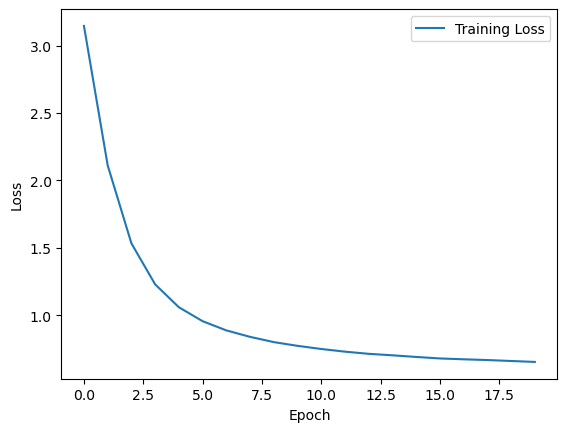

In [ ]:
# Plot training loss curve
plt.plot(bow_train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy, Precision, Recall, and F1 score
Plot the accuracy, precision, recall, and f1 score of both training and test set over epochs

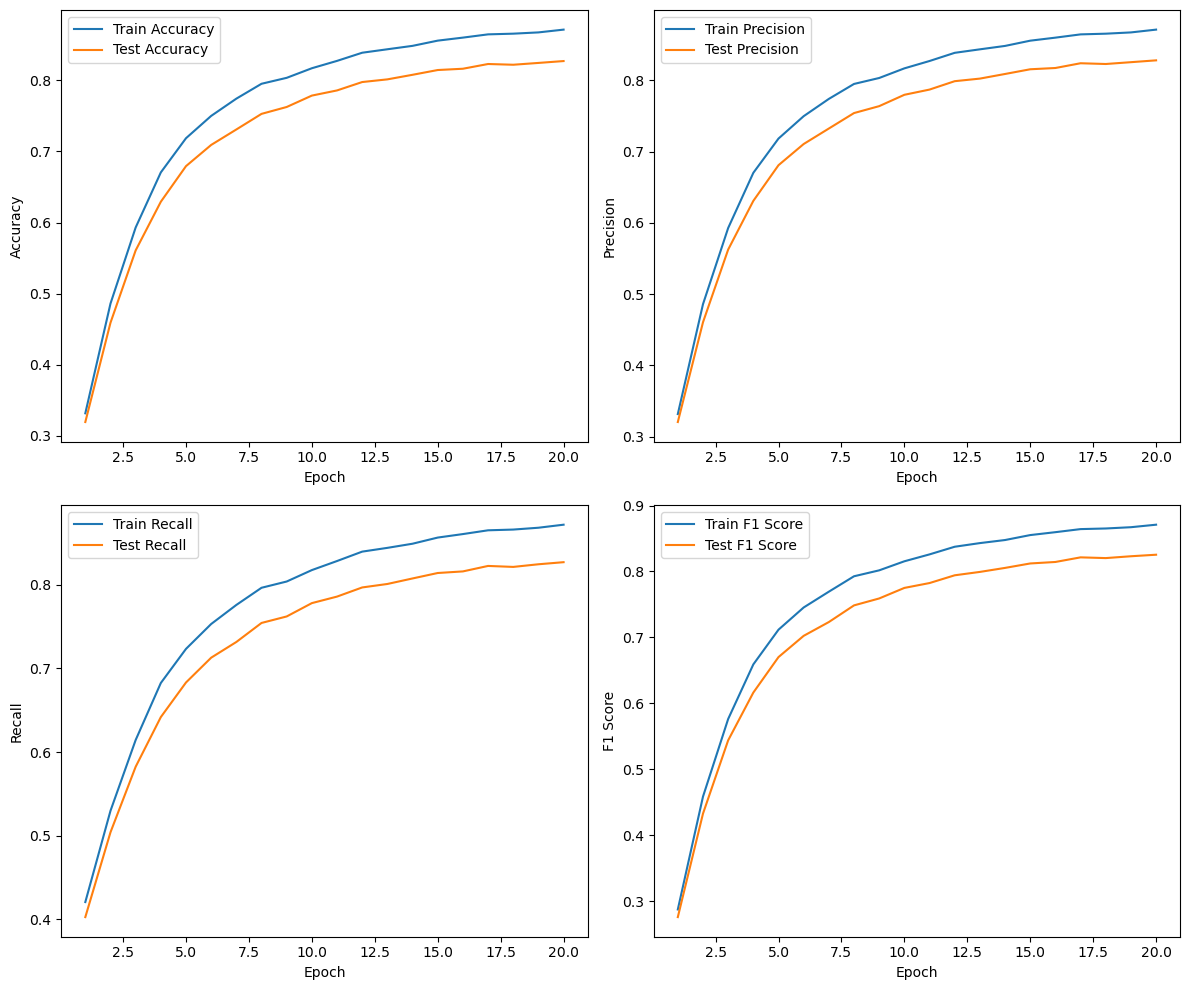

In [171]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


bow_train_accuracies = [accuracy_score(bow_train_labels[i], bow_train_predictions[i]) for i in range(bow_num_epochs)]
bow_train_precision = [recall_score(bow_train_labels[i], bow_train_predictions[i], average="macro") for i in range(bow_num_epochs)]
bow_train_recall = [precision_score(bow_train_labels[i], bow_train_predictions[i], average="macro") for i in range(bow_num_epochs)]
bow_train_f1_score = [f1_score(bow_train_labels[i], bow_train_predictions[i], average="macro") for i in range(bow_num_epochs)]
bow_test_accuracies = [accuracy_score(test_df['review_score'], i) for i in bow_test_predictions]
bow_test_precision = [recall_score(test_df['review_score'], i, average="macro") for i in bow_test_predictions]
bow_test_recall = [precision_score(test_df['review_score'], i, average="macro") for i in bow_test_predictions]
bow_test_f1_score = [f1_score(test_df['review_score'], i, average="macro") for i in bow_test_predictions]

# Draw an accuracy curve
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, bow_num_epochs + 1), bow_train_accuracies, label='Train Accuracy')
plt.plot(range(1, bow_num_epochs + 1), bow_test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(1, bow_num_epochs + 1), bow_train_precision, label='Train Precision')
plt.plot(range(1, bow_num_epochs + 1), bow_test_precision, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(range(1, bow_num_epochs + 1), bow_train_recall, label='Train Recall')
plt.plot(range(1, bow_num_epochs + 1), bow_test_recall, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(1, bow_num_epochs + 1), bow_train_f1_score, label='Train F1 Score')
plt.plot(range(1, bow_num_epochs + 1), bow_test_f1_score, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [178]:
print("Accuracy:", bow_test_accuracies[-1])
print("Precision:", bow_test_precision[-1])
print("Recall:", bow_test_recall[-1])
print("F1 Score:", bow_test_f1_score[-1])

Accuracy: 0.827148226552037
Precision: 0.8280949958785652
Recall: 0.8269970288736789
F1 Score: 0.8254189944358238


### Predict new reviews

Positive review

In [ ]:
import torch
import pandas as pd

# input text
new_text = "This item is perfect"

# Perform the same preprocessing on new text as during training
cleaned_text = clean_review(new_text)

# Vectorize new text using previous CountVectorizer
vectorized_text = vectorizer.transform([cleaned_text]).toarray()

# Convert vectorized text data to PyTorch Tensor
input_tensor = torch.tensor(vectorized_text, dtype=torch.float32).to(device)

# Forecasting using the BOW model
with torch.no_grad():
    output = bow_model(input_tensor)
    predicted_score = np.rint(output.squeeze().cpu().numpy())

print(f"The predicted score for the new text is: {predicted_score}")

The predicted score for the new text is: 4.0


[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Negative review

In [ ]:
new_text = "This item is awful"

# Perform the same preprocessing on new text as during training
cleaned_text = clean_review(new_text)

# Vectorize new text using previous CountVectorizer
vectorized_text = vectorizer.transform([cleaned_text]).toarray()

# Convert vectorized text data to PyTorch Tensor
input_tensor = torch.tensor(vectorized_text, dtype=torch.float32).to(device)

# Forecasting using the BOW model
with torch.no_grad():
    output = bow_model(input_tensor)
    predicted_score = np.rint(output.squeeze().cpu().numpy())

print(f"The predicted score for the new text is: {predicted_score}")

The predicted score for the new text is: 1.0


[nltk_data] Downloading package stopwords to C:\Users\Jiamu
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Prepare for BERT model

In [ ]:
# before, we have df_upsampled = df_upsampled[["review_id","text","review_score"]] which contains
# the key information from the original data
df_upsampled

review_id  \
0       product_review_017949   
1       product_review_015132   
2       product_review_025117   
3       product_review_017401   
4       product_review_006999   
...                       ...   
115729  product_review_023525   
115730  product_review_023394   
115731  product_review_000064   
115732  product_review_002084   
115733  product_review_025933   

                                                     text  review_score  
0       game fun wanted shooter type gaming sorry happ...           1.0  
1       love game death want buried flawed love uncond...           5.0  
2       thing note game one unique combat system diffe...          -1.0  
3                great game trying finish soon great game           4.0  
4       mixed product took figure price go instruction...           2.0  
...                                                   ...           ...  
115729                                   really challenge           5.0  
115730  knight old republic 2 way extraordinarily simi...           3.0  
115731  long time follower atlus release one might eve...           3.0  
115732  new dragon age story rating may higher fan ori...           4.0  
115733  lava string improved sound playability bariton...           5.0  

[115734 rows x 3 columns]

## Processing: Prepare Data for BERT
Generate inputs, attention masks, segments and labels for both training and validation set.

In [ ]:
# To prepare the data for the BERT model, we need to tokenize the text
from transformers import BertTokenizer
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Adjust label encoding for review scores ranging from -1 to 5
label_encoder = LabelEncoder()
df_upsampled['encoded_labels'] = label_encoder.fit_transform(df_upsampled['review_score'] + 1)

# Set batch size
batch_size = 512
max_seq_length = 64
num_batches = len(df_upsampled) // batch_size + 1

# Initialize lists to store batched tensors
input_ids_list, attention_masks_list, segment_ids_list, labels_list = [], [], [], []

# Process data into batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df_upsampled))

    # Tokenize text data in batches
    tokenized_data_batch = df_upsampled['text'].iloc[start_idx:end_idx].apply(
        lambda x: tokenizer(x, return_tensors='pt', padding='max_length', truncation=True, max_length=max_seq_length)
    )

    # Concatenate tokenized tensors into batched tensors
    input_ids_batch = torch.cat([tensor['input_ids'] for tensor in tokenized_data_batch])
    attention_masks_batch = torch.cat([tensor['attention_mask'] for tensor in tokenized_data_batch])
    segment_ids_batch = torch.cat([tensor.get('token_type_ids', torch.zeros_like(tensor['input_ids'])) for tensor in tokenized_data_batch])

    # Extract labels for the current batch
    labels_batch = torch.tensor(df_upsampled['encoded_labels'].iloc[start_idx:end_idx].values)

    # Append batched tensors to lists
    input_ids_list.append(input_ids_batch)
    attention_masks_list.append(attention_masks_batch)
    segment_ids_list.append(segment_ids_batch)
    labels_list.append(labels_batch)

# Concatenate lists into final tensors
input_ids = torch.cat(input_ids_list)
attention_masks = torch.cat(attention_masks_list)
segment_ids = torch.cat(segment_ids_list)
labels = torch.cat(labels_list)

# Print shapes of the tensors
print("Input IDs shape:", input_ids.shape)
print("Attention Masks shape:", attention_masks.shape)
print("Segment IDs shape:", segment_ids.shape)
print("Labels shape:", labels.shape)


Input IDs shape: torch.Size([115734, 64])
Attention Masks shape: torch.Size([115734, 64])
Segment IDs shape: torch.Size([115734, 64])
Labels shape: torch.Size([115734])


## Model
### Create the BERT model and dataloaders



In [ ]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Define the BERT model architecture for sequence classification
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Split the data into training and validation sets
split = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
bert_train_inputs, bert_val_inputs, bert_train_labels, bert_val_labels = split
bert_train_masks, bert_val_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2, random_state=42)
bert_train_segments, bert_val_segments, _, _ = train_test_split(segment_ids, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch datasets
bert_train_dataset = TensorDataset(bert_train_inputs, bert_train_masks, bert_train_segments, bert_train_labels)
bert_val_dataset = TensorDataset(bert_val_inputs, bert_val_masks, bert_val_segments, bert_val_labels)

# Set batch size and create data loaders
bert_batch_size = 128
bert_train_dataloader = DataLoader(bert_train_dataset, batch_size=bert_batch_size, shuffle=True)
bert_val_dataloader = DataLoader(bert_val_dataset, batch_size=bert_batch_size, shuffle=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Define parameters for BERT model and training process

In [ ]:
from tqdm import tqdm

# Define optimizer and loss function
bert_optimizer = AdamW(bert_model.parameters(), lr=1e-5)
bert_criterion = nn.CrossEntropyLoss()

# Move optimizer state to the same device as the model
optimizer_state = bert_optimizer.state_dict()
for key, value in optimizer_state["state"].items():
    optimizer_state["state"][key] = {k: v.to(device) for k, v in value.items()}
bert_optimizer.load_state_dict(optimizer_state)

# Training loop
bert_num_epochs = 10

bert_loss = []
bert_train_predictions = []
bert_val_predictions = []
# Used to calculate accuracy, precision, and f1 score on training set
# since training dataloader is shuffled
bert_train_labels = []

# Move the model to the CUDA device if available
bert_model.to(device)
def bert_train():
    for epoch in range(bert_num_epochs):
        bert_model.train()
        total_loss = 0

        for batch in tqdm(bert_train_dataloader, desc=f'Epoch [{epoch+1}/{bert_num_epochs}]: Training'):
            input_ids, attention_masks, segment_ids, labels = batch

            # Move tensors to the CUDA device if available
            input_ids = input_ids.to(device)
            attention_masks = attention_masks.to(device)
            segment_ids = segment_ids.to(device)
            labels = labels.to(device)

            bert_optimizer.zero_grad()

            # Forward pass
            outputs = bert_model(input_ids, 
                                 attention_mask=attention_masks, 
                                 token_type_ids=segment_ids, 
                                 labels=labels)

            # Extract logits from the output
            logits = outputs.logits

            # Calculate loss
            loss = bert_criterion(logits, labels)

            total_loss += loss.item()

            # Backward pass
            loss.backward()
            bert_optimizer.step()

        average_loss = total_loss / len(bert_train_dataloader)
        bert_loss.append(average_loss)
        print(f"Epoch {epoch + 1}/{bert_num_epochs}, Average Training Loss: {average_loss}")

        # Save the model and optimizer state at the end of each epoch
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': bert_model.state_dict(),
            'optimizer_state_dict': bert_optimizer.state_dict(),
            'loss': average_loss
        }

        torch.save(checkpoint, f'model_checkpoint_epoch_{epoch + 1}.pt')

        # Evaluation
        bert_model.eval()
        with torch.no_grad():
            train_predictions = []
            train_labels = []
            for batch in tqdm(bert_train_dataloader, desc=f'Epoch [{epoch+1}/{bert_num_epochs}]: Evaluating on training set'):
                input_ids, attention_masks, segment_ids, labels = batch
                # Move tensors to the CUDA device if available
                input_ids = input_ids.to(device)
                attention_masks = attention_masks.to(device) 
                segment_ids = segment_ids.to(device)
                labels = labels.to(device)

                outputs = bert_model(input_ids, 
                                     attention_mask=attention_masks, 
                                     token_type_ids=segment_ids, 
                                     labels=labels)

                logits = outputs.logits
                pred_y = torch.argmax(logits, dim=1)
                train_predictions.extend(pred_y.cpu().numpy())
                train_labels.extend(labels.cpu().numpy())
            bert_train_predictions.append(train_predictions)
            bert_train_labels.append(train_labels)



            val_predictions = []
            for batch in tqdm(bert_val_dataloader, desc=f'Epoch [{epoch+1}/{bert_num_epochs}]: Evaluating on test set'):
                input_ids, attention_masks, segment_ids, labels = batch
                # Move tensors to the CUDA device if available
                input_ids = input_ids.to(device)
                attention_masks = attention_masks.to(device)
                segment_ids = segment_ids.to(device)
                labels = labels.to(device)

                outputs = bert_model(input_ids, 
                                     attention_mask=attention_masks, 
                                     token_type_ids=segment_ids, 
                                     labels=labels)

                logits = outputs.logits
                pred_y = torch.argmax(logits, dim=1)
                val_predictions.extend(pred_y.cpu().numpy())
            bert_val_predictions.append(val_predictions)


In [ ]:
bert_train()
torch.cuda.empty_cache()

Epoch [1/10]: Training: 100%|██████████| 724/724 [02:07<00:00,  5.69it/s]


Epoch 1/10, Average Training Loss: 1.3598624673666875


Epoch [2/10]: Training: 100%|██████████| 724/724 [02:09<00:00,  5.59it/s]


Epoch 2/10, Average Training Loss: 0.7669851045170542


Epoch [3/10]: Training: 100%|██████████| 724/724 [02:08<00:00,  5.64it/s]


Epoch 3/10, Average Training Loss: 0.4885056185541232


Epoch [4/10]: Training: 100%|██████████| 724/724 [02:10<00:00,  5.56it/s]


Epoch 4/10, Average Training Loss: 0.36521318888302007


Epoch [5/10]: Training: 100%|██████████| 724/724 [02:08<00:00,  5.65it/s]


Epoch 5/10, Average Training Loss: 0.2904017189754307


Epoch [6/10]: Training: 100%|██████████| 724/724 [02:01<00:00,  5.97it/s]


Epoch 6/10, Average Training Loss: 0.24019187041532597


Epoch [7/10]: Training: 100%|██████████| 724/724 [01:50<00:00,  6.55it/s]


Epoch 7/10, Average Training Loss: 0.19878630707482936


Epoch [8/10]: Training: 100%|██████████| 724/724 [01:48<00:00,  6.64it/s]


Epoch 8/10, Average Training Loss: 0.17194538060781542


Epoch [9/10]: Training: 100%|██████████| 724/724 [01:46<00:00,  6.81it/s]


Epoch 9/10, Average Training Loss: 0.15358073177402684


Epoch [10/10]: Training: 100%|██████████| 724/724 [01:50<00:00,  6.58it/s]


Epoch 10/10, Average Training Loss: 0.13541443577519932


Epoch [10/10]: Evaluating on test set: 100%|██████████| 181/181 [00:11<00:00, 15.26it/s]


Save the model

In [ ]:
import pickle

with open("bert_model.pkl", "wb") as bert:
    pickle.dump(bert_model, bert)

## Evaluation
### Loss
Plot the loss over epochs

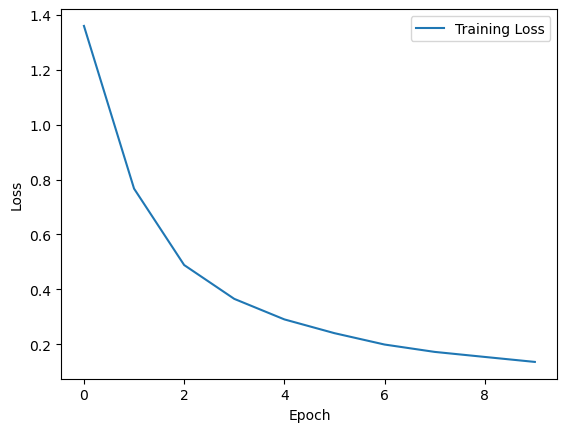

In [ ]:
# Plot training loss curve
plt.plot(bert_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Accuracy, Recall, Precision, F1 Score
Plot the accuracy, precision, recall, and f1 score of both training and test set over epochs

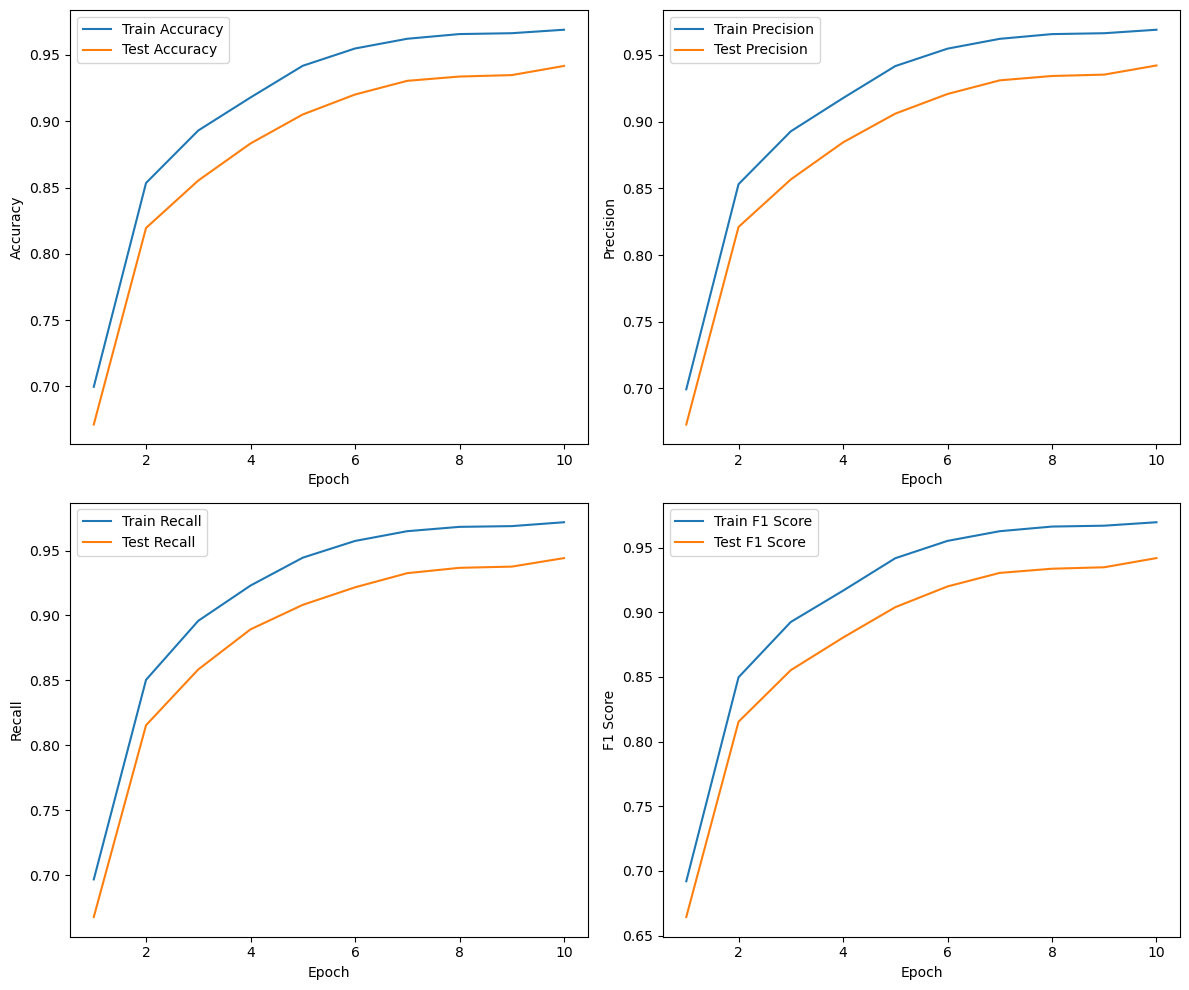

In [167]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


bert_train_accuracies = [accuracy_score(bert_train_labels[i], bert_train_predictions[i]) for i in range(bert_num_epochs)]
bert_train_precision = [recall_score(bert_train_labels[i], bert_train_predictions[i], average="macro") for i in range(bert_num_epochs)]
bert_train_recall = [precision_score(bert_train_labels[i], bert_train_predictions[i], average="macro") for i in range(bert_num_epochs)]
bert_train_f1_score = [f1_score(bert_train_labels[i], bert_train_predictions[i], average="macro") for i in range(bert_num_epochs)]

bert_test_accuracies = [accuracy_score(bert_val_labels, i) for i in bert_val_predictions]
bert_test_precision = [recall_score(bert_val_labels, i, average="macro") for i in bert_val_predictions]
bert_test_recall = [precision_score(bert_val_labels, i, average="macro") for i in bert_val_predictions]
bert_test_f1_score = [f1_score(bert_val_labels, i, average="macro") for i in bert_val_predictions]

# Draw an accuracy curve
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, bert_num_epochs + 1), bert_train_accuracies, label='Train Accuracy')
plt.plot(range(1, bert_num_epochs + 1), bert_test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(1, bert_num_epochs + 1), bert_train_precision, label='Train Precision')
plt.plot(range(1, bert_num_epochs + 1), bert_test_precision, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(range(1, bert_num_epochs + 1), bert_train_recall, label='Train Recall')
plt.plot(range(1, bert_num_epochs + 1), bert_test_recall, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(1, bert_num_epochs + 1), bert_train_f1_score, label='Train F1 Score')
plt.plot(range(1, bert_num_epochs + 1), bert_test_f1_score, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [177]:
print("Accuracy:", bert_test_accuracies[-1])
print("Precision:", bert_test_precision[-1])
print("Recall:", bert_test_recall[-1])
print("F1 Score:", bert_test_f1_score[-1])

Accuracy: 0.9416771071845164
Precision: 0.9421314161743138
Recall: 0.9441547223989453
F1 Score: 0.9418438017259069


### Predict new reviews

Postive review

In [168]:
from transformers import BertTokenizer
import torch

# Assuming tokenizer and model are already initialized
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input text
new_text = "This item is perfect"

# Tokenize and convert to tensors
tokenized_data = tokenizer(new_text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
input_ids = tokenized_data['input_ids'].to(device)
attention_mask = tokenized_data['attention_mask'].to(device)
token_type_ids = tokenized_data.get('token_type_ids', torch.zeros_like(input_ids)).to(device)

# Make prediction
bert_model.eval()
with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

# Assuming the model is trained for classification
predicted_scores = torch.softmax(outputs.logits, dim=1).squeeze().cpu().numpy()

# Interpret the predictions
predicted_label = torch.argmax(outputs.logits).item()

print(f"The predicted score for the new text is: {predicted_label}")

The predicted score for the new text is: 5


Negative review

In [169]:
# Assuming tokenizer and model are already initialized
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input text
new_text = "This item is awful"

# Tokenize and convert to tensors
tokenized_data = tokenizer(new_text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
input_ids = tokenized_data['input_ids'].to(device)
attention_mask = tokenized_data['attention_mask'].to(device)
token_type_ids = tokenized_data.get('token_type_ids', torch.zeros_like(input_ids)).to(device)

# Make prediction
bert_model.eval()
with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

# Assuming the model is trained for classification
predicted_scores = torch.softmax(outputs.logits, dim=1).squeeze().cpu().numpy()

# Interpret the predictions
predicted_label = torch.argmax(outputs.logits).item()

print(f"The predicted score for the new text is: {predicted_label}")

The predicted score for the new text is: 1
